# Bank Personal Loan

Attribute Information:
- ID : Customer ID
- Age : Customer's age in completed years
- Experience : #years of professional experience
- Income : Annual income of the customer ($000)
- ZIP Code : Home Address ZIP code.
- Family : Family size of the customer
- CCAvg : Avg. spending on credit cards per month ($000)
- Education : Education Level.
  - Undergrad = 3;
  - Graduate = 2;
  - Advanced/Professional = 1
- Mortgage : Value of house mortgage if any. ($000)
- Personal Loan : Did this customer accept the personal loan offered in the last campaign?
- Securities Account : Does the customer have a securities account with the bank?
- CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
- Online : Does the customer use internet banking facilities?
- Credit card : Does the customer use a credit card issued by

## 1. Import libraries

In [79]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
# calculate accuracy measures and confusion matrix
from sklearn import metrics

## 2. Read the data 

In [80]:
my_data = pd.read_csv('Bank.csv')
my_data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","Personal_Loan","SecuritiesAccount","CDAccount","Online","CreditCard"]


## 3. Basic EDA

In [81]:
my_data.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


1. Variabel ID tidak menyimpan informasi apapun
   
2. Terdapat dua kolom data nominal :
   1. ID    
   2. Zip Code
    
3. Terdapat dua kolom data kategorik :
   1. Family - Jumlah anggota keluarga    
   2. Education - Tingkat pendidikan
    
4. There are 5 independent variables:
   1. Age:Age of the customer
   2. Experience:Years of experience of the customer
   3. Income:Annual income in dollars
   4. CCAvg:Average credit card spending
   5. Mortage:Value of House Mortgage

5. There are 5 binary category variables:
   1. Personal Loan:Did this customer accept the personal loan offered in the last campaign?
   2. Securities Account:Does the customer have a securities account with the bank?
   3. CD Account:Does the customer have a certificate of deposit (CD) account with the bank?
   4. Online:Does the customer use internet banking facilities?
   5. Credit Card:Does the customer use a credit card issued by UniversalBank?

6. Terakhir ada variabel : Personal Loan, yang merupakan variabel yang akan coba kita prediksi

### a. Shape of the data

In [82]:
my_data.shape

(5000, 14)

Ada 5000 konsumen (baris) dan 14 variabel (kolom)

In [83]:
my_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

### b. Data type of each attribute 

In [84]:
my_data.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
Personal_Loan          int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

Hampir semuanya bertipe data numerik

## c.Check for the null values 

In [85]:
#null values
my_data.isnull().values.any()

False

Tidak ada nilai NULL di dalam dataset ini.

## d. Checking the presence of missing values 

In [86]:
val=my_data.isnull().values.any()

if val==True:
    print("Ada missing value sebanyak : ", my_data.isnull().values.sum())
    my_data=my_data.dropna() # menghapus mising value 
else:
    print("Tidak ada missing value")

Tidak ada missing value


## e. Summary of numerical attributes 

In [87]:
my_data.describe().T
# 'T' berarti mendeskripsikan dalam bentuk dataframe

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## f. Finding unique data 

In [88]:
my_data.apply(lambda x: len(x.unique()))

ID                   5000
Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

In [89]:
#Find Shape
my_data.shape

(5000, 14)

ada 5000 baris dan 14 kolom 

## g.Ploting histogram

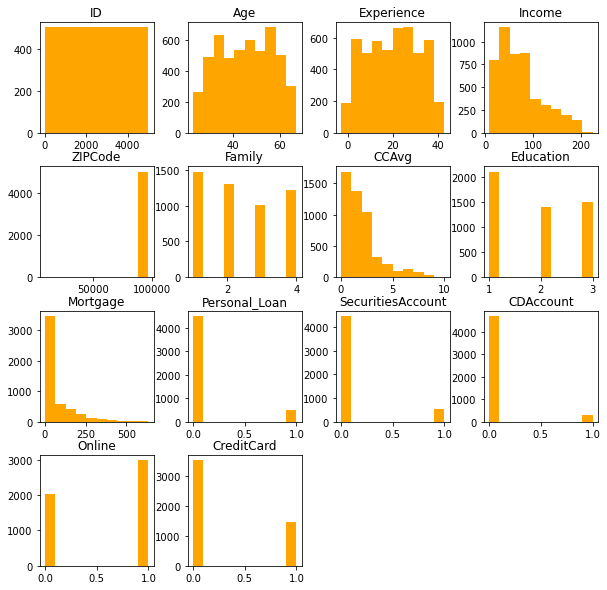

In [90]:
my_data.hist(figsize=(10, 10), color="orange", grid=False)
plt.show()


# 4.PairPlot

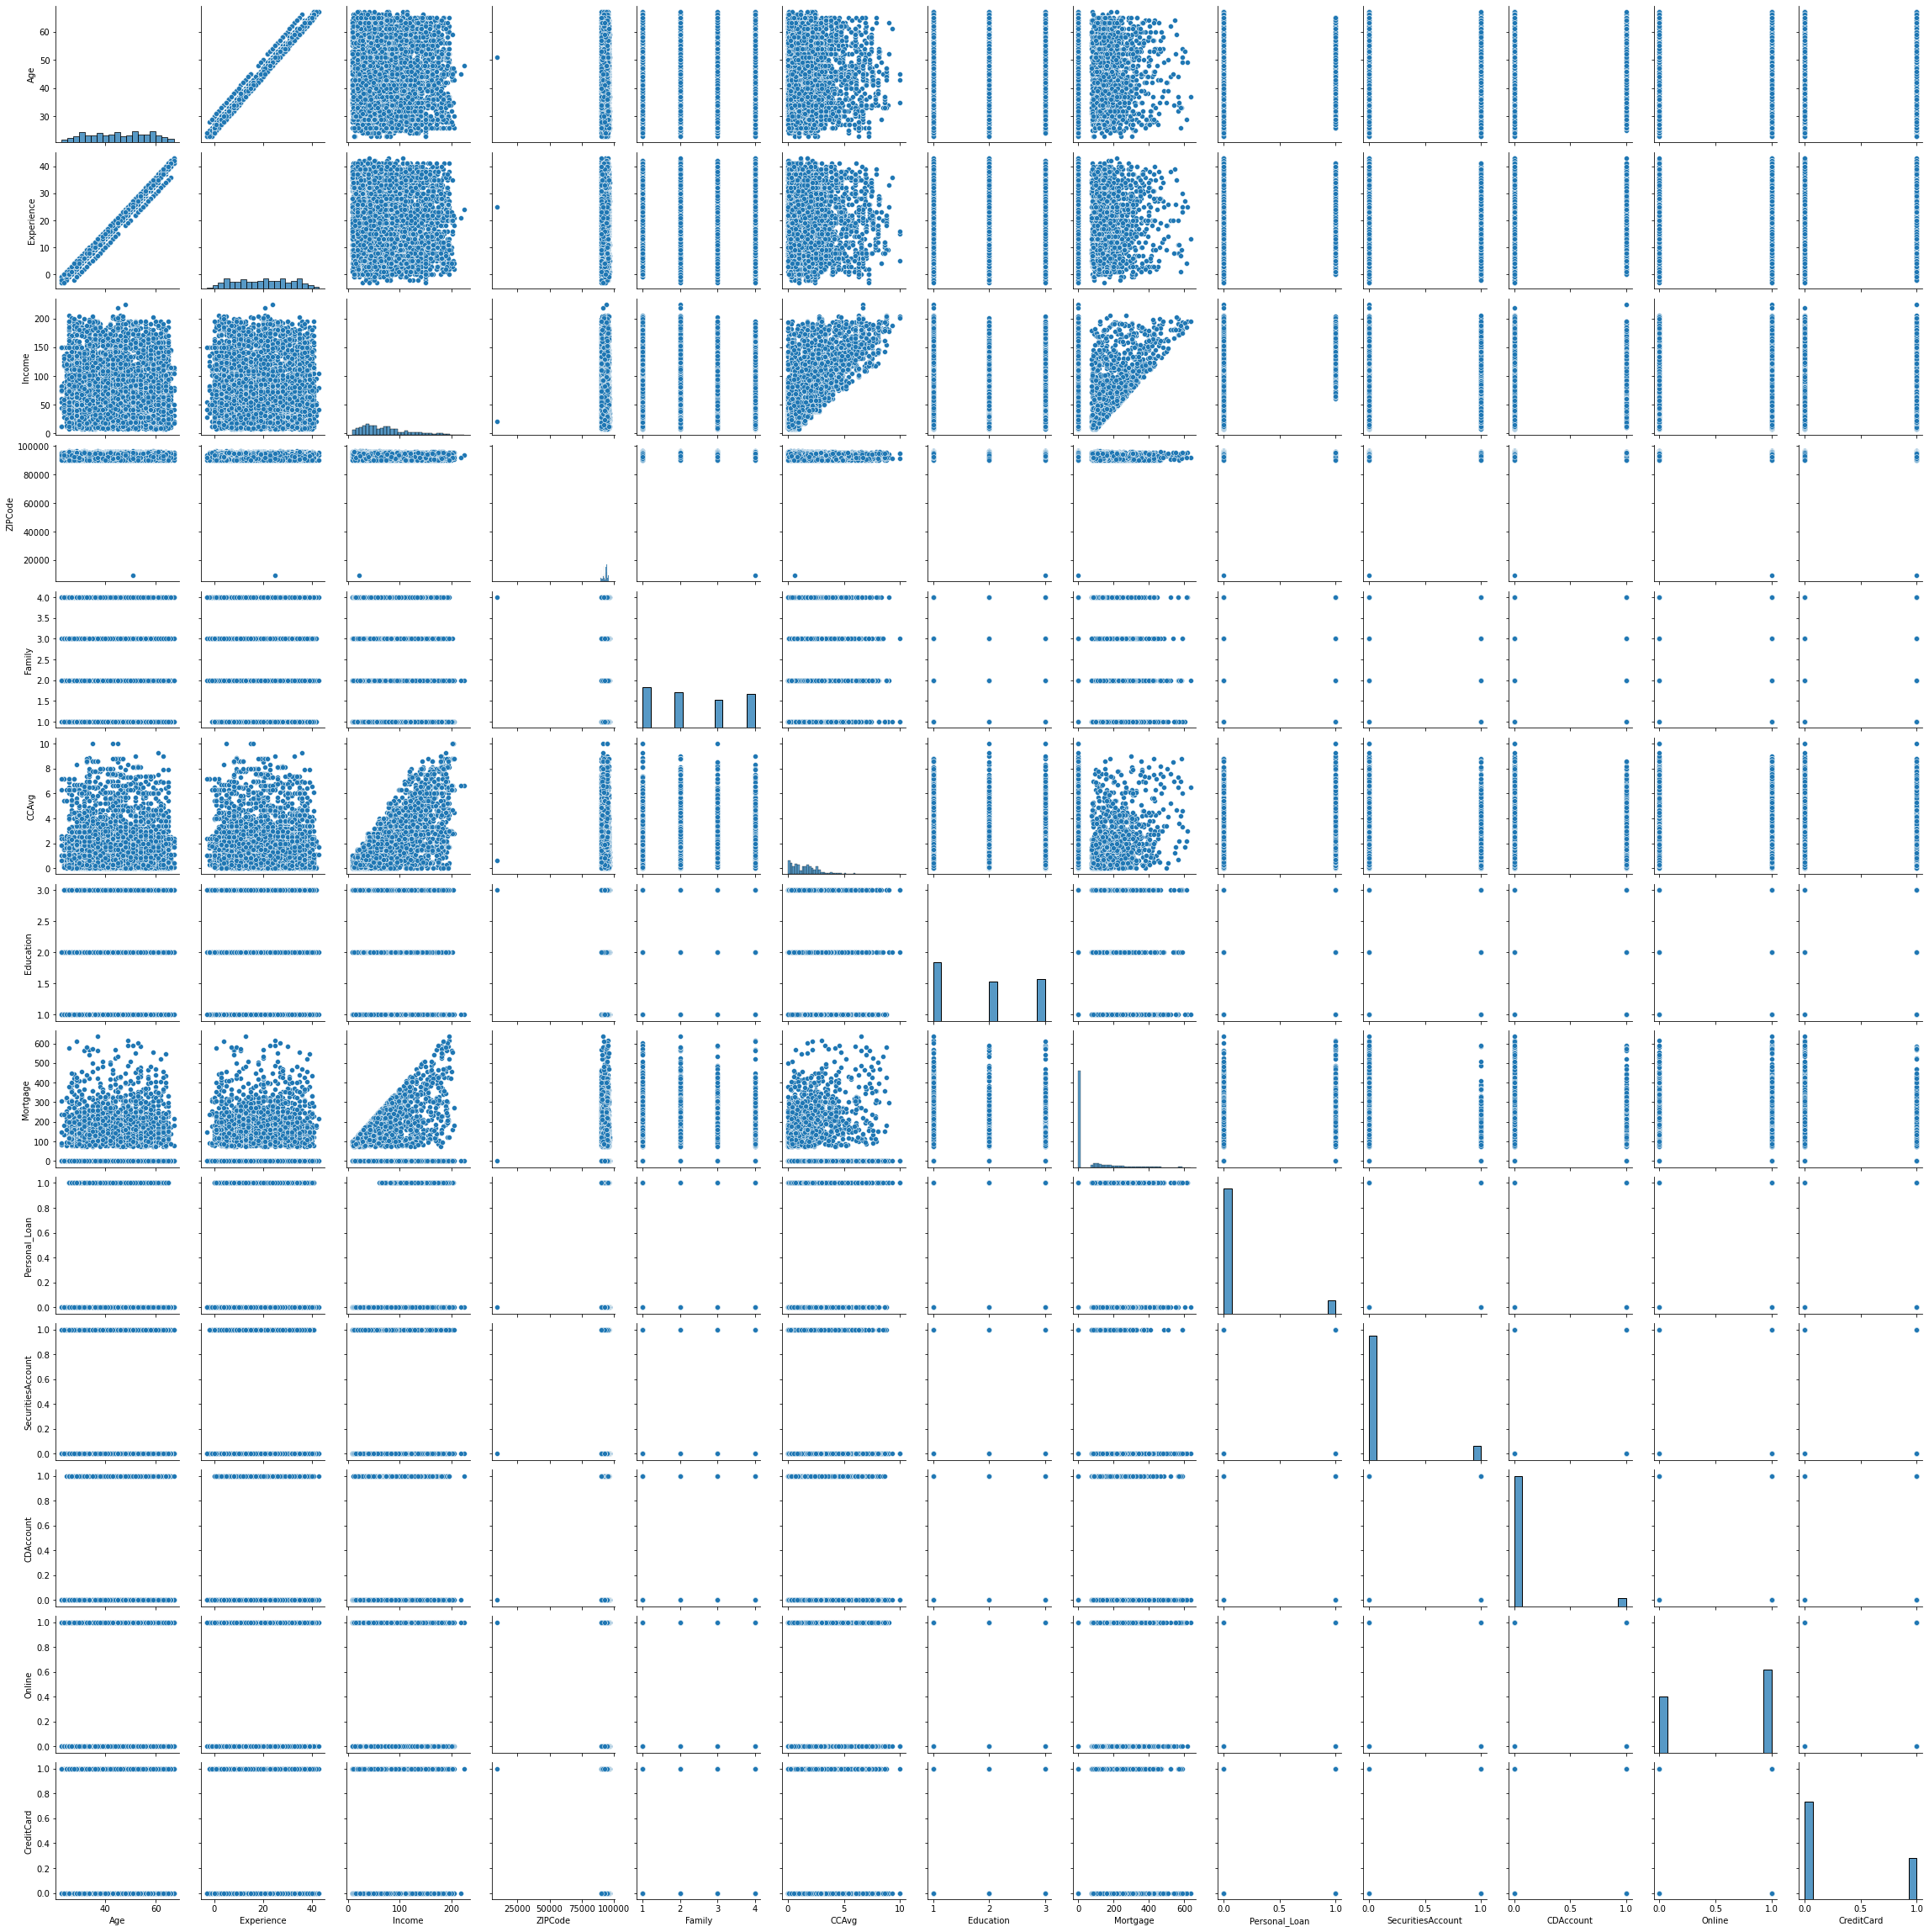

In [91]:
sns.pairplot(my_data.iloc[:, 1:])


In [92]:
# hapus data yang konsumen yanng belum pernah meminjam (Experience-nya negatif)
my_data[my_data['Experience'] < 0]['Experience'].count()


52

Ada 52 yang konsumen yanng belum pernah meminjam (Experience-nya negatif)

### Menghapus nilai negatif

In [93]:
my_dataExp = my_data.loc[my_data['Experience'] >0]
negExp = my_data.Experience < 0
column_name = 'Experience'
my_data_list = my_data.loc[negExp]['ID'].tolist()

In [94]:
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [95]:
for id in my_data_list:
    age = my_data.loc[np.where(my_data['ID']==id)]["Age"].tolist()[0]
    education = my_data.loc[np.where(my_data['ID']==id)]["Education"].tolist()[0]
    df_filtered = my_dataExp[(my_dataExp.Age == age) & (my_dataExp.Education == education)]
    exp = df_filtered['Experience'].median()
    my_data.loc[my_data.loc[np.where(my_data['ID']==id)].index, 'Experience'] = exp

### Menghitung kembali data di kolom Experience yang bernilai negatif

In [96]:
my_data[my_data['Experience'] < 0]['Experience'].count()

0

In [97]:
my_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Mengukur skewness (ketidaksimetrisan dalam distribusi nilai)  

In [98]:
my_data.skew(axis = 0, skipna = True) 

ID                    0.000000
Age                  -0.029341
Experience           -0.013188
Income                0.841339
ZIPCode             -12.500221
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
Personal_Loan         2.743607
SecuritiesAccount     2.588268
CDAccount             3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

Skewness yang bernilai positif berarti ekor distribusi berada di sebelah kanan nilai terbanyak. Berarti, sebagian besar distribusi berada di nilai rendah. Skewness yang bernilai negatif berarti ekor distribusi berada di sebelah kiri, menunjukkan bahwa sebagian besar nilai berada di sisi kanan kurva. Sementara skewness bernilai nol berarti nilai terdistribusi secara simetris, dengan jarak antara ekor distribusi sebelah kanan dan kiri sama besar

## 5.Boxplot 

<AxesSubplot:xlabel='Age'>

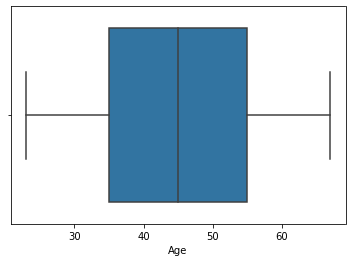

In [99]:
sns.boxplot(x=my_data["Age"])

<AxesSubplot:xlabel='Experience'>

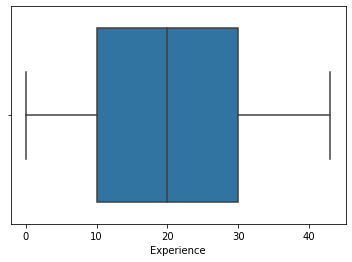

In [100]:
sns.boxplot(x=my_data["Experience"])

<AxesSubplot:xlabel='Income'>

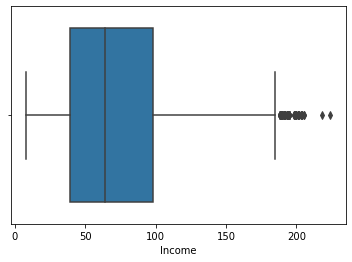

In [101]:
sns.boxplot(x=my_data["Income"])

<AxesSubplot:xlabel='Education', ylabel='Income'>

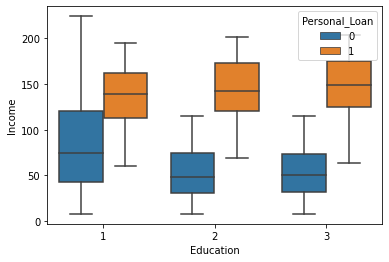

In [102]:
sns.boxplot(x='Education',y='Income',hue='Personal_Loan',data=my_data)

Disini bisa dilihat bahwa konsumen berpendidikan jenis 1 (profesional) memiliki maxmimum penghasilan yang lebih banyak dari konsumen 2 dan 3

Terlihat bahwa jenis konsumen yang memiliki pinjaman penghasilannya berada di level yang sama.

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

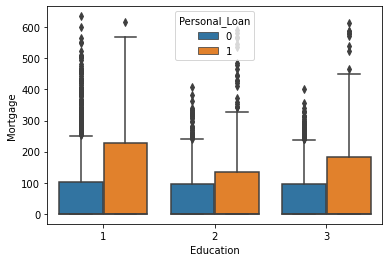

In [103]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal_Loan", data=my_data)

Banyak sekali outliner ketika dibandigkan dengan mortgage atau di indonesia sering disebut hipotek

<AxesSubplot:xlabel='Family', ylabel='Income'>

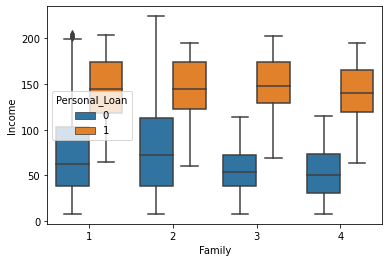

In [104]:
sns.boxplot(x="Family",y="Income",hue="Personal_Loan",data=my_data)

Keluarga berpenghasilan kurang dari 100k lebih kecil kemungkinannya memiliki pinjaman di bank

# 6.CountPlot

<AxesSubplot:xlabel='Family', ylabel='count'>

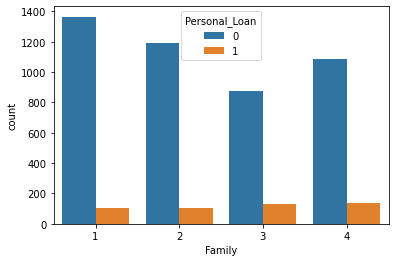

In [105]:
sns.countplot(x='Family',data=my_data,hue='Personal_Loan')

Tidak ada korelasi ketika kita membandingkan jumlah anggota keluarga dengan pinjaman di bank.

<AxesSubplot:xlabel='SecuritiesAccount', ylabel='count'>

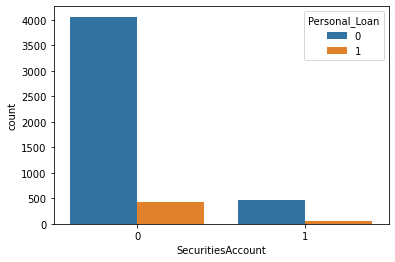

In [106]:
sns.countplot(x="SecuritiesAccount", data=my_data,hue="Personal_Loan")

Mayoritas nasabah yang tidak memiliki Personal loan memiliki Rekening Efek.

<AxesSubplot:xlabel='CDAccount', ylabel='count'>

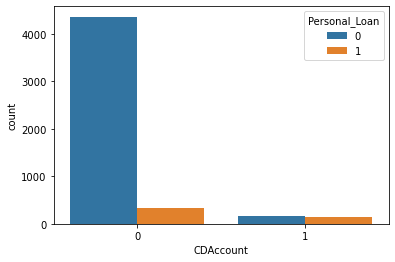

In [107]:
sns.countplot(x='CDAccount',data=my_data,hue='Personal_Loan')

Nasabah yang tidak memiliki CDAccount tidak memiliki Personal loan.

Nasabah yang memiliki CDAccount hampir pasti memiliki  Personal Loan.

<AxesSubplot:xlabel='Online', ylabel='count'>

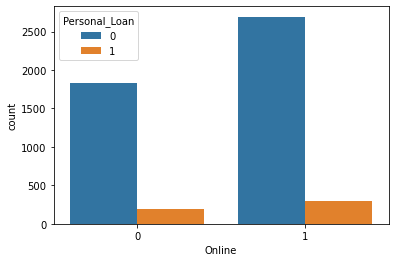

In [108]:
sns.countplot(x='Online',data=my_data,hue='Personal_Loan')

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

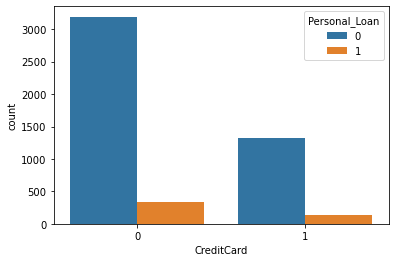

In [109]:
sns.countplot(x='CreditCard',data=my_data,hue='Personal_Loan')

# 7.ScatterPlot

Text(0.5, 1.0, 'Distribusi Pendidikan Berdasarkan Usia dan Pengalaman')

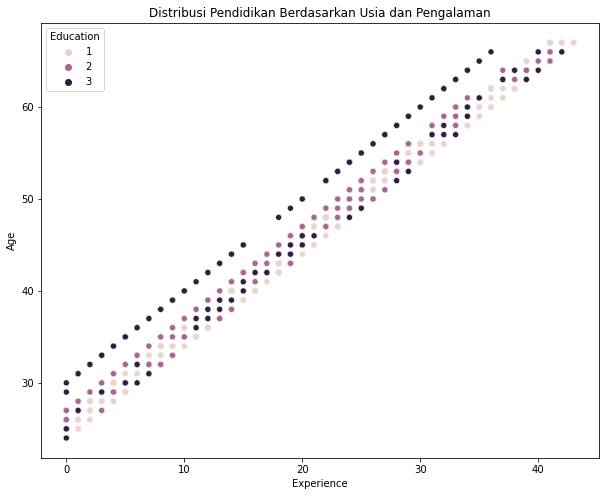

In [110]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = "Experience", y = "Age",data =my_data, hue = "Education")
plt.xlabel("Experience")
plt.ylabel("Age")
plt.title("Distribusi Pendidikan Berdasarkan Usia dan Pengalaman")


Pengalaman dan Usia memberikan korelasi positif, karena Pengalaman meningkat Usia juga meningkat.

Kita dapat melihat, dengan bantuan warna, banyak orang berada di tingkat pendidikan sarjana.

# 8.Histplot

<AxesSubplot:xlabel='CCAvg', ylabel='Count'>

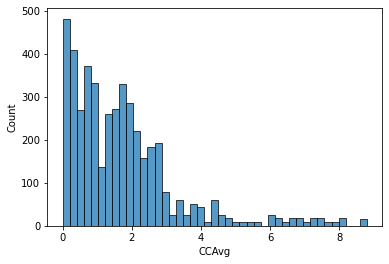

In [111]:
sns.histplot(my_data[my_data.Personal_Loan == 0]['CCAvg'])


<AxesSubplot:xlabel='CCAvg', ylabel='Count'>

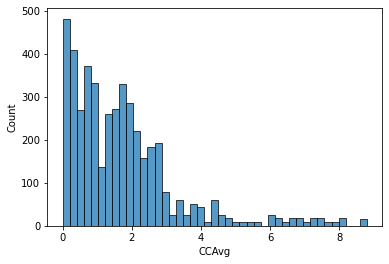

In [112]:
sns.histplot(my_data[my_data.Personal_Loan == 0]['CCAvg'])


<AxesSubplot:xlabel='CCAvg', ylabel='Count'>

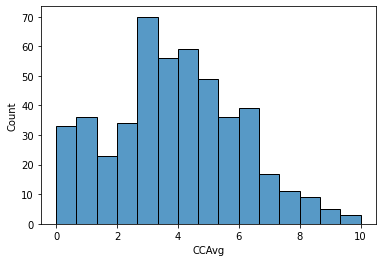

In [113]:
sns.histplot(my_data[my_data.Personal_Loan == 1]['CCAvg'])


Di sini kita dapat melihat bahwa pelanggan dengan CCAvg lebih tinggi memiliki Personal Loan.

In [114]:
#Pengeluaran kartu kredit pelanggan Non-Pinjaman
my_data[my_data.Personal_Loan == 0]['CCAvg'].median()*1000


1400.0

In [115]:
#Pengeluaran kartu kredit pelanggan Pinjaman
my_data[my_data.Personal_Loan == 1]['CCAvg'].median()*1000


3800.0

Pelanggan yang membelanjakan kartu kredit rata-rata dengan median 3800 dolar memberikan kemungkinan personal loan yang tinggi, sedangkan pelanggan yang membelanjakan kartu kredit yang lebih rendah dengan median 1400 dolar cenderung tidak memiliki pinjaman.

# 9.Calculate the correlation matrix

In [116]:
cor=my_data.corr()
cor

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,1.000000,-0.008473,-0.009308,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994159,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009308,0.994159,1.000000,-0.048095,-0.030649,-0.049420,-0.047694,0.013075,-0.012935,-0.011498,0.001059,0.007381,0.014501,0.007935
Income,-0.017695,-0.055269,-0.048095,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.013432,-0.029216,-0.030649,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.049420,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.047694,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013075,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.012935,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.011498,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


# 10.Heatmap

<AxesSubplot:>

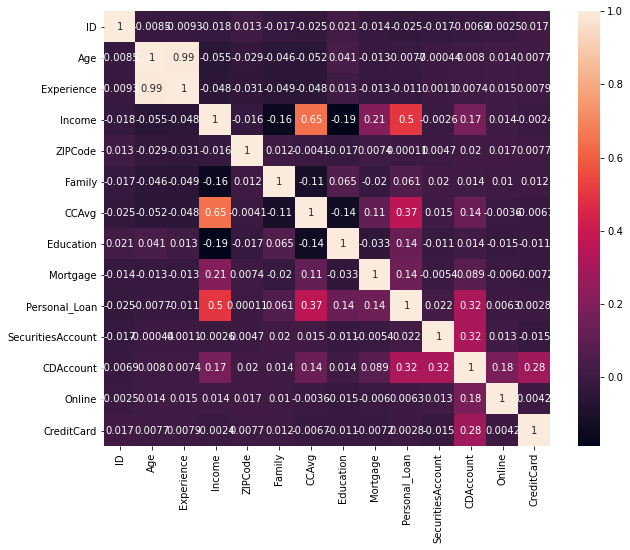

In [117]:
plt.subplots(figsize=(10,8))
sns.heatmap(cor,annot=True)

# 11.Conclusion from EDA:

1. Untuk "CCAvg" kita bisa melihat bahwa hampir 70% nasabah memiliki Nilai KPR kurang dari 40K dan nilai maksimumnya adalah 635K.
2. Distribusi "Family" dan "Education" merata
3. Penghasilan dan CCAvg berkorelasi sedang.
4. Pengalaman dan Usia memberikan korelasi positif.
5. Keluarga dengan pendapatan kurang dari 100K cenderung tidak memiliki pinjaman, daripada keluarga dengan pendapatan tinggi.
6. Pelanggan dengan tingkat pendidikan 1 memiliki pendapatan lebih dari yang lain.
7. Pelanggan dengan dan tanpa Personal Loan memiliki Mortage yang tinggi.
8. Tidak ada pengaruh yang besar pada Personal Loan jika kita mempertimbangkan atribut Family. Tetapi Keluarga dengan ukuran 3 mengambil lebih banyak personal loan dibandingkan dengan ukuran keluarga lainnya.
9. Mayoritas nasabah yang tidak memiliki Personal loan memiliki Rekening Efek.
10. Pelanggan yang tidak memiliki CDAccount tidak memiliki pinjaman pribadi.

# 12.Applying classification models (Logistic, K-NN and Naïve Bayes,SVM)

# A.Logistic regression 

In [118]:
data=my_data.drop(['ID','ZIPCode','Experience'], axis =1 )
data.head(10)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
5,37,29,4,0.4,2,155,0,0,0,1,0
6,53,72,2,1.5,2,0,0,0,0,1,0
7,50,22,1,0.3,3,0,0,0,0,0,1
8,35,81,3,0.6,2,104,0,0,0,1,0
9,34,180,1,8.9,3,0,1,0,0,0,0


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   int64  
 1   Income             5000 non-null   int64  
 2   Family             5000 non-null   int64  
 3   CCAvg              5000 non-null   float64
 4   Education          5000 non-null   int64  
 5   Mortgage           5000 non-null   int64  
 6   Personal_Loan      5000 non-null   int64  
 7   SecuritiesAccount  5000 non-null   int64  
 8   CDAccount          5000 non-null   int64  
 9   Online             5000 non-null   int64  
 10  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


In [120]:
data1=data[['Age','Income','Family','CCAvg','Education','Mortgage','SecuritiesAccount','CDAccount','Online','CreditCard','Personal_Loan']]

In [121]:
data1.head(10)

,Age,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,Personal_Loan
0,25,49,4,1.6,1,0,1,0,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1,0
5,37,29,4,0.4,2,155,0,0,1,0,0
6,53,72,2,1.5,2,0,0,0,1,0,0
7,50,22,1,0.3,3,0,0,0,0,1,0
8,35,81,3,0.6,2,104,0,0,1,0,0
9,34,180,1,8.9,3,0,0,0,0,0,1


In [122]:
data1.shape

(5000, 11)

In [123]:
data1["Personal_Loan"].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [124]:
array = data1.values
X = array[:,0:9] 
Y = array[:,10]  
test_size = 0.30 # taking 70:30 training and test set
seed = 5  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) # To set the random state
type(X_train)

numpy.ndarray

In [125]:
# Fit the model on 30%
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print('Accuracy:',model_score)
print('confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
A=model_score  # Accuracy of Logistic regression model


Accuracy: 0.9473333333333334
confusion_matrix:
[[1330   21]
 [  58   91]]


# B.Naive Bayes

In [126]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [127]:
X = data1.values[:,0:9]  ## Features
Y = data1.values[:,10]  ## Target.values[:,10]  ## Target

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 7)

In [129]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [130]:
Y_pred = clf.predict(X_test)

In [131]:
B=accuracy_score(Y_test, Y_pred, normalize = True) #Accuracy of Naive Bayes' Model
print('Accuracy_score:',B)

Accuracy_score: 0.8793333333333333


In [132]:
from sklearn.metrics import recall_score
print(recall_score(Y_test, Y_pred))

0.5942028985507246


In [133]:
print('Confusion_matrix:')
print(metrics.confusion_matrix(Y_test,Y_pred))

Confusion_matrix:
[[1237  125]
 [  56   82]]


# C.KNN

In [134]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [135]:
X_std = pd.DataFrame(StandardScaler().fit_transform(data1))
X_std.columns = data1.columns

In [136]:
#split the dataset into training and test datasets
import numpy as np
from sklearn.model_selection import train_test_split

# Transform data into features and target
X = np.array(data1.iloc[:,1:11]) 
y = np.array(data1['Personal_Loan'])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [137]:
print(X_train.shape)
print(y_train.shape)

(4000, 10)
(4000,)


In [138]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))
# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=7)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.949
0.942
0.942
0.94


In [139]:
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [140]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


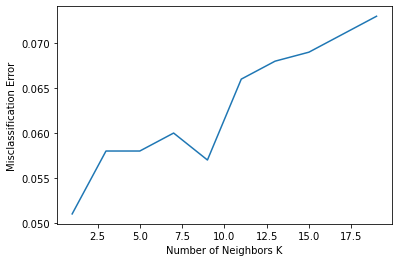

In [141]:
#Plot misclassification error vs k (with k value on X-axis) using matplotlib.
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [142]:
#Use k=1 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
C=accuracy_score(y_test, y_pred)   #Accuracy of KNN model
print('Accuracy_score:',C)    
print(recall_score(y_test, y_pred))


Accuracy_score: 0.949
0.7045454545454546


In [143]:
print('Confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_pred))

Confusion_matrix:
[[887  25]
 [ 26  62]]


# D.SVM 

In [144]:
from sklearn.model_selection import train_test_split

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

target = my_data["Personal_Loan"]
features=my_data.drop(['ID','ZIPCode','Experience'], axis =1 )
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.30, random_state = 10)

In [145]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model= SVC(kernel='linear')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)


In [ ]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

1.0
1.0


In [ ]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[1360    0]
 [   0  140]]


In [ ]:
#Store the accuracy results for each kernel in a dataframe for final comparison
resultsDf = pd.DataFrame({'Kernel':['Linear'], 'Accuracy': svc_model.score(X_train, y_train)})
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,1.0


In [ ]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

SVC()

In [ ]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9102857142857143
0.9066666666666666


In [ ]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Kernel':['RBF'], 'Accuracy': svc_model.score(X_train, y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,1.000000
0,RBF,0.910286


In [ ]:
#Building a Support Vector Machine on train data(changing the kernel)
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9228571428571428
0.9213333333333333


In [ ]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Kernel':['Poly'], 'Accuracy': svc_model.score(X_train, y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,1.000000
0,RBF,0.910286
0,Poly,0.922857


In [ ]:
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

##print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.8673333333333333


In [ ]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Kernel':['Sigmoid'], 'Accuracy': svc_model.score(X_train, y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,1.000000
0,RBF,0.910286
0,Poly,0.922857
0,Sigmoid,0.871714


# 13.Comparison of different  Models:

In [ ]:
print(A) #Accuracy of Logistic regression model
print(B)  # Accuracy of Naive Bayes' Model
print(C)  # Accuracy of KNN Model
resultsDf  # Accuracy of SVM Model


0.9473333333333334
0.8793333333333333
0.949


,Kernel,Accuracy
0,Linear,1.000000
0,RBF,0.910286
0,Poly,0.922857
0,Sigmoid,0.871714


# Conclusion:

## Tujuan klasifikasi adalah untuk memprediksi kemungkinan pelanggan mengambil Personal loan.

## Dari nilai akurasi algoritma "KNN" memiliki akurasi dan stabilitas tertinggi, kita juga bisa menggunakan metode SVM karena semua Kernel memiliki akurasi yang baik.